In [21]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Interval Estimates

0-25 mins

In [22]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


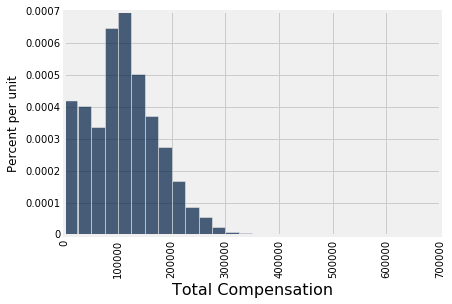

In [23]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins)

In [24]:
pop_median = np.median(sf.column(2))
pop_median

107219.48

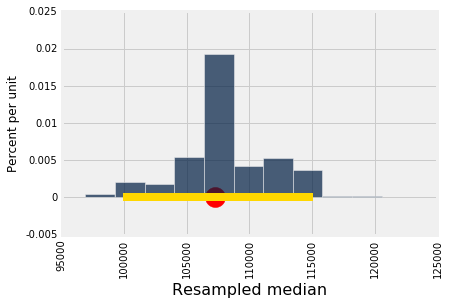

In [25]:
sample_from_population = sf.sample(500, with_replacement=False)

resampled_medians = []
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)
    
interval_95 = [
    percentile(2.5, resampled_medians),
    percentile(97.5, resampled_medians)
]

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0, 0], color='gold', lw=8)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400);

In [26]:
def bootstrap_median(sample_from_population, label, repetitions):
    resampled_medians = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        median = np.median(resample.column(label))
        resampled_medians.append(median)
    return resampled_medians

In [ ]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals, in the table intervals

left_ends = make_array()
right_ends = make_array()

total_comps = sf.select(2)
for i in np.arange(100):
    sample_from_pop = total_comps.sample(200, with_replacement=False)
    medians = bootstrap_median(sample_from_pop, 'Total Compensation', 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))
    print('Iteration:', i)

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [50]:
intervals.show(3)

Left,Right
92751.2,121147
100930,122886
99323.4,120401


In [30]:
intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

91

In [ ]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)

intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plt.figure(figsize=(8,8))
n=100
for i in np.arange(n):
    ends = intervals2.column(i)
    plt.plot(ends, make_array(i+1, i+1), color='gold')
plt.plot(make_array(pop_median, pop_median), make_array(0, n), color='red', lw=2)
plt.xlabel('Median (dollars)')
plt.ylabel('Replication')
plt.title('Population Median and Intervals of Estimates');

## Baby Weights

25-45 mins

An actual sample!

Let's get an estimate of the birth weight : gestational days ratio.

In [51]:
births = Table.read_table('http://inferentialthinking.com/notebooks/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [52]:
babies = births.select('Birth Weight', 'Gestational Days')
babies.show(3)

Birth Weight,Gestational Days
120,284
113,282
128,279


In [53]:
ratios = babies.with_column(
    'Ratio BW/GD', babies.column(0)/babies.column(1)
)
ratios.show(3)

Birth Weight,Gestational Days,Ratio BW/GD
120,284,0.422535
113,282,0.400709
128,279,0.458781


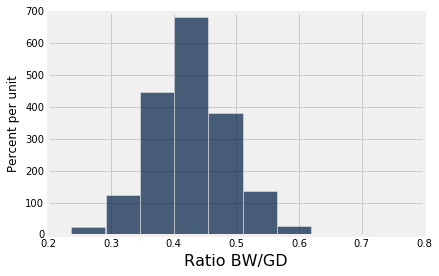

In [34]:
ratios.hist(2)

In [35]:
np.median(ratios.column(2))

0.42907801418439717

In [40]:
resampled_medians = bootstrap_median(ratios, 2, 5000)

Approximate 95% Bootstrap Confidence Interval for the Population Median
[ 0.4255  0.4327]


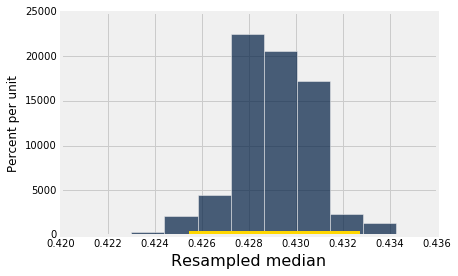

In [41]:
interval_95 = make_array(
    percentile(2.5, resampled_medians),
    percentile(97.5, resampled_medians)
)

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approximate 95% Bootstrap Confidence Interval for the Population Median')
print(np.round(interval_95, 4))

In [ ]:
interval_80 = make_array(
    percentile(10, resampled_medians),
    percentile(90, resampled_medians)
)

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_80, [0, 0], color='gold', lw=8)
print('Approximate 80% Bootstrap Confidence Interval for the Population Median')

print(np.round(interval_80, 4))

Take attendance

What if we want to estimate the mean instead of the median?

In [43]:
def bootstrap_mean(sample_from_population, label, repetitions):
    resampled_means = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        mean = np.mean(resample.column(label))
        resampled_means.append(mean)
    return resampled_means

In [44]:
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    interval_95 = make_array(
        percentile(2.5, resampled_means),
        percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plt.plot(interval_95, [0, 0], color='gold', lw=8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 26.887  27.561]


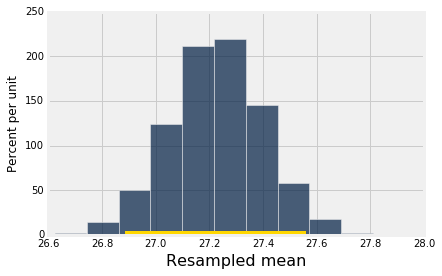

In [45]:
bootstrap_ci_mean(births, 'Maternal Age', 5000)

In [ ]:
bootstrap_ci_mean(births, 'Birth Weight', 5000)

Discussion question

In [ ]:
births.hist('Maternal Age')